# Acquire & Refine the Data

Lets see the sources for getting historical information posted on HackerNews

- **HackerNews API** - YCombinator provides an official hackernew api through Firebase. This is a near real-time database and provides both an *items* (stories and comments) as well as an *users* api.  It is available at https://github.com/HackerNews/API

- **BigQuery** : Google Big Query has a daily updated HackerNews public dataset available (from 2006 to date). It only has *items* information. It is available at https://bigquery.cloud.google.com/table/bigquery-public-data:hacker_news.full


## Items Data 

The schema for the Big Query table is

| Field       | Type      | Description                           |
|:------------|----------:|:--------------------------------------|
| by          | STRING    | The username of the item's author.    |
| score       | INTEGER   | Story score                           |
| time        | INTEGER   | Unix time                             |
| timestamp   | TIMESTAMP | Timestamp for the unix time           |
| title       | STRING    | Story title                           |
| type        | STRING    | Type of details (comment, story, ...) |
| url         | STRING    | Story url                             |
| text        | STRING    | Story or comment text                 |
| parent      | INTEGER   | Parent comment ID                     |
| deleted     | BOOLEAN   | Is deleted?                           |
| dead        | BOOLEAN   | Is dead?                              |
| descendants | INTEGER   | Number of story or poll descendants   |
| id          | INTEGER   | The item's unique id.                 |
| ranking     | INTEGER   | Comment ranking                       |


- Get all the stories posted on HackerNews in **2017 (till date)**. 
- To ensure a relevant set, we will limit the stories which have atleast have **score of 5 points or more** on them. 

We will can use the BigQuery Web Interface to do this. (We can also use the python api for doing it...)

```SQL
#standardSQL
SELECT * 
FROM `bigquery-public-data.hacker_news.full`
WHERE type="story" AND score > 4 AND EXTRACT(YEAR FROM timestamp)=2017
```

This dataset is available in `data\stories2017score5.gzip`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
# Read the gzip file into memory
stories = pd.read_csv("data/stories2017score5.csv.gzip", compression='gzip', low_memory=False)

In [4]:
stories.shape

(56757, 14)

In [5]:
len(stories.id.unique())

56757

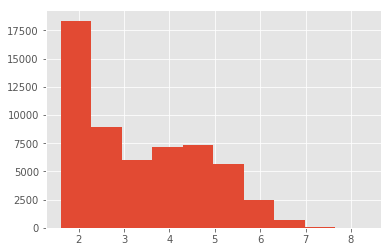

In [6]:
np.log(stories.score).hist()

## Users Data

Lets get all the comments from the database

```SQL
#standardSQL
SELECT by, parent
FROM `bigquery-public-data.hacker_news.full`
WHERE type="comment" AND parent IN 
 (SELECT id
  FROM `bigquery-public-data.hacker_news.full`
  WHERE type="story" AND score > 4 AND EXTRACT(YEAR FROM timestamp)=2017)
```  


In [7]:
comments = pd.read_csv("data/bycomments2017score5.csv.gz", compression='gzip', low_memory=False)

In [8]:
comments.tail()

,by,parent
450879,wowthatseuffing,14616440
450880,wtflmaohnisdumb,15443326
450881,ycmbntrthrwaway,13566822
450882,yetanotherwayne,14802154
450883,zaogaothrowaway,14573959


In [9]:
users = comments.by.unique()

In [10]:
users

array([nan, '05', '0a', ..., 'wtflmaohnisdumb', 'yetanotherwayne',
       'zaogaothrowaway'], dtype=object)

In [11]:
users10 = users[:10]
users10

array([nan, '05', '0a', '1k', '21', '2m', '37', '47', '5h', '8a'], dtype=object)

In [12]:
from hackernews import HackerNews
hn = HackerNews()

In [13]:
len(users)/500

139.346

In [14]:
141%140

1

In [15]:
def getUserData(users): 
    '''
    Function to get user details from the HackerNews API
    And store in a dataframe
    '''
    column_names = ['user', 'created', 'karma', 'submitted']
    userDf = pd.DataFrame(columns = column_names)

    for index, user in enumerate(users):
        
        #Get User Details
        try: 
            userDetails = hn.get_user(user)
        
        
            # Get details
            created = userDetails.created
            karma = userDetails.karma
            submitted = len(userDetails.submitted)

            #Store in the DataFrame
            userDf.loc[index] = [user, created, karma, submitted] 
            
            if index%140 == 0:
                print(index)
            
        except:
            continue
     
    return userDf

In [20]:
userDf10 = getUserData(users10)

In [21]:
userDf10

,user,created,karma,submitted
1,05,2015-06-10 18:40:59,155,74
2,0a,2016-10-23 15:09:40,3,1
3,1k,2017-05-08 11:09:03,18,8
4,21,2016-02-02 03:53:02,2186,583
5,2m,2014-11-19 21:08:27,1,2
6,37,2011-09-08 19:44:39,53,36
7,47,2009-11-20 23:01:53,144,60
8,5h,2011-01-20 17:49:25,530,169
9,8a,2016-12-29 15:32:31,8,7


In [ ]:
userDfAll = getUserData(users[:10000])

140
280
420
560
700
840
980
1120
1260
1400
1540
1680
1820
1960
2100
2240
2380
2520
2660
2800
2940
3080
3220
3360
3500
3640
3780
3920


In [ ]:
import asyncio
from asyncio_hn import ClientHN

In [ ]:
import aiohttp
import json
N = 1_000

async def advance_run(loop):
    # We init the client - extension of aiohttp.ClientSession
    conn = aiohttp.TCPConnector(limit=1000, loop=loop)
    async with ClientHN(loop=loop, queue_size=1000, connector=conn, progress_bar=True, debug=True) as hn:
        # Download the user information
        #usersInfo = await hn.users((user.get("by"), user.get("created"), user.get("submitted")) for user in users[:10])
        usersInfo = await hn.users(users[1:1000])
    return usersInfo
        #with open("data/usersInfo.json", "w") as f:
        #    json.dump(usersInfo, f)


In [ ]:
loop = asyncio.get_event_loop()
usersInfo = loop.run_until_complete(advance_run(loop))

In [ ]:
usersInfo

In [ ]:
len(users)

In [ ]:
hn.get_user("sadfsafassdafdasfs")

In [ ]:
# We will be using the Haxor - An unofficial Hacker News API in Python to access it
# https://github.com/avinassh/haxor
# ! pip install haxor

from hackernews import HackerNews



In [ ]:
from hackernews import HackerNews
hn = HackerNews()

In [ ]:
user = hn.get_user('05')

In [ ]:
user.created

In [ ]:
import datetime

In [ ]:
type(user)

In [ ]:
user.submitted

In [ ]:
numbers = [1, 2, 3, 4, 5]

In [ ]:
[(n, n**2) for n in numbers]